In [15]:
# Create an engine for the `hawaii.sqlite` database
from sqlalchemy import create_engine
engine = create_engine("sqlite:///hawaii.sqlite") # a DataBase file in this case should be in the same dir
type(engine) # QC step

sqlalchemy.engine.base.Engine

#### Explore Database

In [16]:
# Use the Inspector to explore the database and print the table names
from sqlalchemy import inspect # for this inspect need to be imported from sqlalchemy 
inspector = inspect(engine)  # make inspector - based on the sqlalchemy engine 
db_tables=inspector.get_table_names() # from inspector get table names

db_tables # QC Step - check if names consistant with db

['measurements', 'stations']

In [17]:
# Use Inspector to print the column names and types
columns = inspector.get_columns(db_tables[0])
for c in columns:
    print(c['name'], c["type"])


id INTEGER
station VARCHAR
date VARCHAR
prcp FLOAT
tobs INTEGER


In [18]:
# create a list for the 'measurements' table cols
ms_col=[c['name'] for c in columns]
ms_col

['id', 'station', 'date', 'prcp', 'tobs']

In [19]:
# Use Inspector to print the column names and types
columns = inspector.get_columns(db_tables[1])
for c in columns:
    print(c['name'], c["type"])

station VARCHAR
name VARCHAR
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [45]:
# create a list for the 'stationss' table cols
st_col=[c['name'] for c in columns]
st_col

['station', 'name', 'latitude', 'longitude', 'elevation']

In [21]:
# Use `engine.execute` to select and display the first 10 rows from the measurements table
engine.execute('SELECT * FROM measurements LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65),
 (2, 'USC00519397', '2010-01-02', 0.0, 63),
 (3, 'USC00519397', '2010-01-03', 0.0, 74),
 (4, 'USC00519397', '2010-01-04', 0.0, 76),
 (5, 'USC00519397', '2010-01-06', 0.03, 73),
 (6, 'USC00519397', '2010-01-07', 0.06, 70),
 (7, 'USC00519397', '2010-01-08', 0.0, 64),
 (8, 'USC00519397', '2010-01-09', 0.0, 68),
 (9, 'USC00519397', '2010-01-10', 0.0, 73),
 (10, 'USC00519397', '2010-01-11', 0.01, 64)]

In [22]:
# Use `engine.execute` to select and display stations table
engine.execute('SELECT * FROM stations').fetchall()

[('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

#### Reflect database and Query 

In [25]:
# Reflect Database into ORM class
from sqlalchemy.ext.automap import automap_base

Base = automap_base()
Base.prepare(engine, reflect=True)
Stations = Base.classes.stations
Measurements = Base.classes.measurements

In [26]:
Stations # QC step 

sqlalchemy.ext.automap.stations

In [27]:
Measurements # QC step 

sqlalchemy.ext.automap.measurements

In [28]:
# Start a session to query the database
from sqlalchemy.orm import Session
session = Session(engine)

In [30]:
st_col

['station', 'name', 'latitude', 'longitude', 'elevation']

In [49]:
# Query Stations for ['station', 'name', 'latitude', 'longitude', 'elevation']
stations_results = session.query(Stations.station, Stations.name, Stations.latitude, Stations.longitude, Stations.elevation )

In [47]:
# Query Stations for ['station', 'name', 'latitude', 'longitude', 'elevation']
# adding Station. to the col name 
st_col=['Station.' +i for i in st_col]
stations_results = session.query(st_col[0], st_col[1], st_col[2], st_col[3], st_col[4] )
    #order_by(Emoji.score.desc()).all()
### END SOLUTION

In [46]:
st_col[0]

'station'

In [50]:
for station in stations_results:
    print(station)

('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)
('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6)
('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0)
('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)
('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)
('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5)
('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9)
('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9)
('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)


### Precipitation Analysis

* Design a query to retrieve the last 12 months of precipitation data.

* Select only the `date` and `prcp` values.

* Load the query results into a Pandas DataFrame and set the index to the date column.

* Plot the results using the DataFrame `plot` method.

<center><img src='images/precip.png' /></center>

* Use Pandas to print the summary statistics for the precipitation data.

In [52]:
# Reflect Database into ORM class
from sqlalchemy.ext.automap import automap_base

Base = automap_base()
Base.prepare(engine, reflect=True)
Stations = Base.classes.stations
Measurements = Base.classes.measurements

In [53]:
session.query(Measurements.date).order_by(Measurements.date).first() # first data date 

('2010-01-01')

In [55]:
session.query(Measurements.date).order_by(Measurements.date.desc()).first() # last data date of obs 

('2017-08-23')

In [57]:
session.query(Measurements.id).count() # Num of data points 

19550

In [ ]:
# Query to retrieve the last 12 months of precipitation data.

In [61]:
# check the last date to use it to know the start date for 12 months 
last_date_read=session.query(Measurements.date).order_by(Measurements.date.desc()).first() # last data date of obs 
last_date_read[0]

'2017-08-23'

In [81]:
# get data 
prcp_12m=session.query(Measurements.date, Measurements.prcp).filter(Measurements.date > '2016-08-23' ).order_by(Measurements.date).all()

In [82]:
prcp_12m

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', 0.0),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', 1.09),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', 0.03),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('

In [83]:
prcp_12m_date = [i[0] for i in prcp_12m]
prcp_12m_prcp = [i[1] for i in prcp_12m]

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
prcp_12m_df = pd.DataFrame(
    {'date': prcp_12m_date,
     'prcp': prcp_12m_prcp
    })

In [90]:
prcp_12m_df['date'] = pd.to_datetime(prcp_12m_df['date'])


In [91]:
prcp_12m_df.head()

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,0.00
4,2016-08-24,1.22


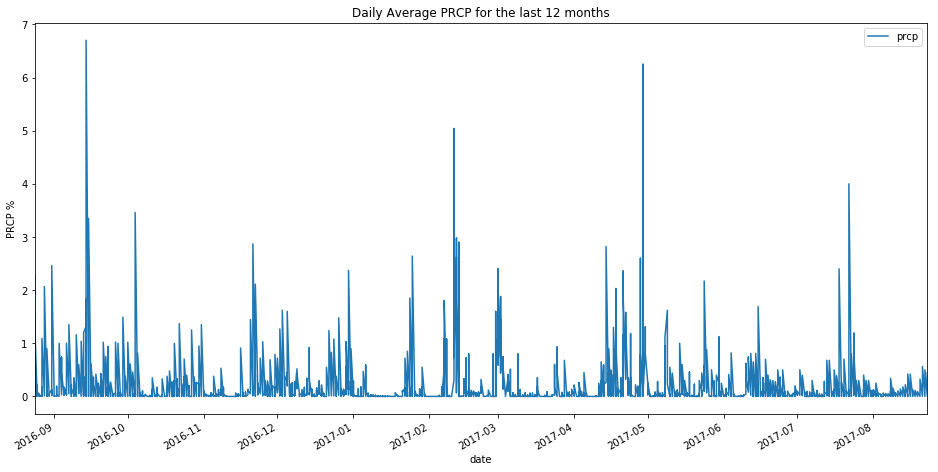

In [93]:
ax=prcp_12m_df.set_index('date').plot(figsize=(16,8))
ax.set_title('Daily Average PRCP for the last 12 months')
ax.set_ylabel('PRCP %')
plt.show()

In [99]:
prcp_12m_df.set_index('date').describe()

,prcp
count,2223.000000
mean,0.168835
std,0.443438
min,0.000000
25%,0.000000
50%,0.020000
75%,0.129688
max,6.700000


In [100]:
#extras
prcp_12m_dfD=prcp_12m_df.set_index('date').resample('D').mean()
prcp_12m_dfW=prcp_12m_df.set_index('date').resample('W').mean()
prcp_12m_dfM=prcp_12m_df.set_index('date').resample('M').mean()

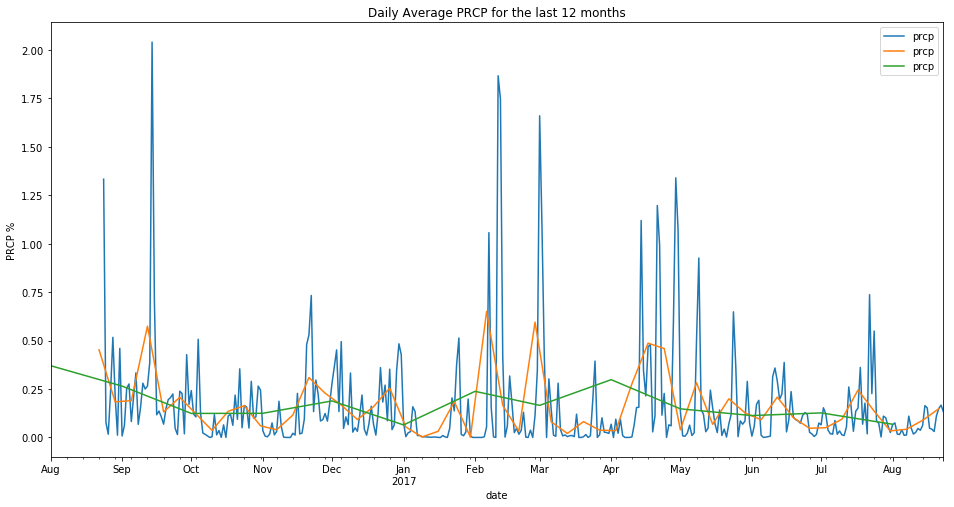

In [101]:
ax=prcp_12m_dfD.plot(figsize=(16,8))
prcp_12m_dfW.plot(ax=ax)
prcp_12m_dfM.plot(ax=ax)
ax.set_title('Daily Average PRCP for the last 12 months')
ax.set_ylabel('PRCP %')
plt.show()

In [59]:
len(session.query(Measurements.date, func.avg(Measurements.prcp)).group_by(Measurements.date).all())

2792

### Station Analysis



* Design a query to find the most active stations.

  * List the stations and observation counts in descending order

  * Which station has the highest number of observations?

* Design a query to retrieve the last 12 months of temperature observation data (tobs).

  * Filter by the station with the highest number of observations.

  * Plot the results as a histogram with `bins=12`.

  <center><img src='images/temp_hist.png' height="400px" /></center>

In [105]:
#total number of stations.
q_stations_all=session.query(Measurements.station).all()

In [107]:
from sqlalchemy import func
q_stations=session.query(Measurements.station, func.count(Measurements.station)).group_by(Measurements.station).all()

In [108]:
#total_station Number 
print(len(q_stations))

9


In [110]:
# list stations and reading count
q_stations

[('USC00511918', 1979),
 ('USC00513117', 2709),
 ('USC00514830', 2202),
 ('USC00516128', 2612),
 ('USC00517948', 1372),
 ('USC00518838', 511),
 ('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00519523', 2669)]

In [117]:
st_id = [i[0] for i in q_stations]
readings = [i[1] for i in q_stations]

stations_read_count = pd.DataFrame(
    {'station_id': st_id,
     'count': readings
    })
stations_read_count

,count,station_id
0,1979,USC00511918
1,2709,USC00513117
2,2202,USC00514830
3,2612,USC00516128
4,1372,USC00517948
5,511,USC00518838
6,2772,USC00519281
7,2724,USC00519397
8,2669,USC00519523


In [152]:
station_max=stations_read_count.loc[stations_read_count['count'].idxmax()]
station_max

count    2772
Name: USC00519281, dtype: int64

In [119]:
stations_read_count.set_index('station_id', inplace=True)

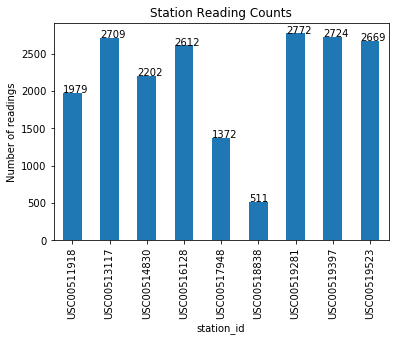

In [128]:
ax=stations_read_count.plot(kind='bar', legend=False)
for p in ax.patches:
    ax.annotate(str(round(p.get_height())), (p.get_x(), p.get_height()))
plt.title('Station Reading Counts')
plt.ylabel('Number of readings')
plt.show()

Design a query to retrieve the last 12 months of temperature observation data (tobs).
Filter by the station with the highest number of observations.
Plot the results as a histogram with bins=12.

In [138]:
USC00519281_read=session.query(Measurements.tobs).filter( (Measurements.station == 'USC00519281') & (Measurements.date > '2016-08-23') ).all()

In [139]:
len(USC00519281_read) # check this if equal to the number exreacted erlier 

351

In [140]:
USC00519281_read=[i[0] for i in USC00519281_read]

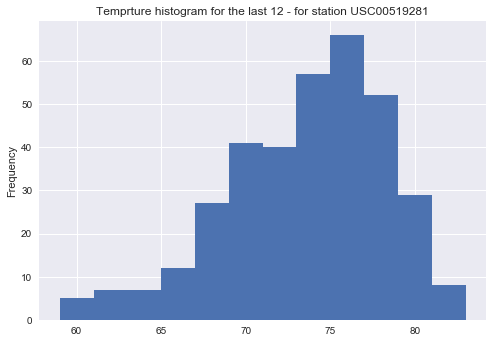

In [154]:
pd.Series(USC00519281_read).plot(kind='hist', bins=12)
plt.title('Temprture histogram for the last 12 - for station USC00519281')
plt.show()

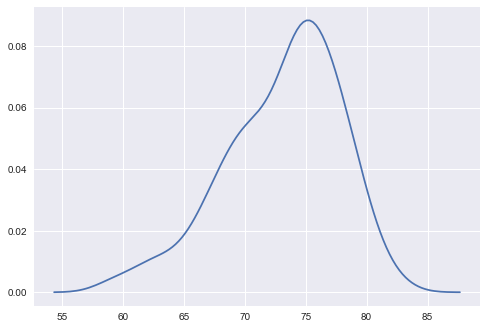

In [155]:
import seaborn as sns
sns.kdeplot(data=pd.Series(USC00519281_read))
plt.show()

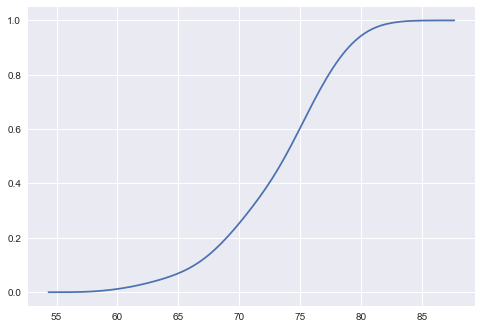

In [156]:
sns.kdeplot(data=pd.Series(USC00519281_read), cumulative=True)
plt.show()

### Temperature Analysis

* Write a function called `calc_temps` that will accept a start date and end date in the format `%Y-%m-%d` and return the minimum, average, and maximum temperatures for that range of dates.

* Use the `calc_temps` function to calculate the min, avg, and max temperatures for your trip using the matching dates from the previous year (i.e. use "2017-01-01" if your trip start date was "2018-01-01")

* Plot the min, avg, and max temperature from your previous query as a bar chart.

  * Use the average temperature as the bar height.

  * Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).

<center><img src='images/temp_avg.png' height="400px"/></center>

In [159]:
def calc_temps (date_st, date_end):
    temps= session.query(func.avg(Measurements.tobs),func.min(Measurements.tobs), func.max(Measurements.tobs)).filter( (Measurements.date >= date_st) & (Measurements.date <= date_end)).all()[0]
    return(temps)

In [160]:
temps=calc_temps('2017-06-01', '2017-06-30')

In [161]:
temps=pd.Series(temps).to_frame()

In [162]:
temps.columns = ['Temprature']
temps

,Temprature
0,77.219895
1,71.000000
2,83.000000


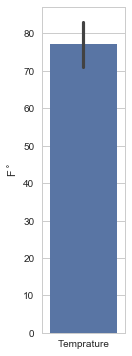

In [165]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(1.5,6))
plt.ylabel('F$^\circ$')
sns.barplot(ax=ax, data=temps)
plt.show()

In [287]:
date_st='2017-06-01'
date_end = '2017-06-30'
session.query(func.avg(Measurements.tobs),func.min(Measurements.tobs), func.max(Measurements.tobs)).filter( (Measurements.date >= date_st) & (Measurements.date <= date_end)).all()

[(77.21989528795811, 71, 83)]

In [166]:
import datetime as dt
from sqlalchemy import func
date_str = ("2017-06-01")
date_end = ("2017-06-30")
session.query(func.avg(Measurements.tobs)).filter((func.strftime("%Y-%m-%d", Measurements.date) >= date_str) & (func.strftime("%Y-%m-%d", Measurements.date) <= date_end)).all()


[(77.21989528795811)]

In [167]:
def calc_temps(start,end):
    #temp_mean=session.query(func.avg(Measurements.tobs)).filter((func.strftime("%Y-%m-%d", Measurements.date) >= date_str) & (func.strftime("%Y-%m-%d", Measurements.date) <= date_end)).all()
    temp_mean=session.query(func.avg(Measurements.tobs)).filter((func.strftime(start, Measurements.date) >= date_str) & (func.strftime("%Y-%m-%d", Measurements.date) <= date_end)).all()
    

In [168]:
date_str = "2017-06-01"
date_end = "2017-06-30"
session.query(Measurements.date, Measurements.tobs).filter((func.strftime("%Y-%m-%d", Measurements.date) >= date_str) & (func.strftime("%Y-%m-%d", Measurements.date) <= date_end)).all()


[('2017-06-01', 79),
 ('2017-06-02', 79),
 ('2017-06-03', 79),
 ('2017-06-04', 79),
 ('2017-06-05', 80),
 ('2017-06-06', 79),
 ('2017-06-07', 79),
 ('2017-06-08', 80),
 ('2017-06-09', 80),
 ('2017-06-10', 77),
 ('2017-06-11', 79),
 ('2017-06-12', 83),
 ('2017-06-13', 80),
 ('2017-06-14', 80),
 ('2017-06-15', 78),
 ('2017-06-16', 79),
 ('2017-06-17', 80),
 ('2017-06-18', 77),
 ('2017-06-19', 80),
 ('2017-06-20', 78),
 ('2017-06-21', 79),
 ('2017-06-22', 80),
 ('2017-06-23', 78),
 ('2017-06-24', 80),
 ('2017-06-25', 80),
 ('2017-06-26', 81),
 ('2017-06-27', 80),
 ('2017-06-28', 79),
 ('2017-06-29', 79),
 ('2017-06-30', 75),
 ('2017-06-01', 76),
 ('2017-06-02', 76),
 ('2017-06-03', 76),
 ('2017-06-04', 78),
 ('2017-06-05', 76),
 ('2017-06-06', 75),
 ('2017-06-07', 75),
 ('2017-06-08', 76),
 ('2017-06-09', 78),
 ('2017-06-10', 75),
 ('2017-06-11', 73),
 ('2017-06-12', 76),
 ('2017-06-13', 76),
 ('2017-06-14', 76),
 ('2017-06-15', 77),
 ('2017-06-16', 76),
 ('2017-06-17', 77),
 ('2017-06-18

### Expected Temps Analysis

Daily normals. Normals are the averages for min, avg, and max temperatures.

Rainfall per weather station using the previous year's matching dates.




In [171]:
date_str = "06-01"
date_end = "06-30"
temp_q=session.query(Measurements.date, Measurements.tobs, Measurements.station).filter((func.strftime("%m-%d", Measurements.date) >= date_str) & (func.strftime("%m-%d", Measurements.date) <= date_end)).all()


In [172]:
temp_q

[('2010-06-01', 78, 'USC00519397'),
 ('2010-06-02', 76, 'USC00519397'),
 ('2010-06-03', 78, 'USC00519397'),
 ('2010-06-04', 76, 'USC00519397'),
 ('2010-06-05', 77, 'USC00519397'),
 ('2010-06-06', 78, 'USC00519397'),
 ('2010-06-07', 77, 'USC00519397'),
 ('2010-06-08', 78, 'USC00519397'),
 ('2010-06-09', 78, 'USC00519397'),
 ('2010-06-10', 79, 'USC00519397'),
 ('2010-06-11', 78, 'USC00519397'),
 ('2010-06-12', 78, 'USC00519397'),
 ('2010-06-13', 78, 'USC00519397'),
 ('2010-06-14', 77, 'USC00519397'),
 ('2010-06-15', 78, 'USC00519397'),
 ('2010-06-16', 78, 'USC00519397'),
 ('2010-06-17', 77, 'USC00519397'),
 ('2010-06-18', 77, 'USC00519397'),
 ('2010-06-19', 82, 'USC00519397'),
 ('2010-06-20', 78, 'USC00519397'),
 ('2010-06-21', 78, 'USC00519397'),
 ('2010-06-22', 78, 'USC00519397'),
 ('2010-06-23', 78, 'USC00519397'),
 ('2010-06-24', 78, 'USC00519397'),
 ('2010-06-25', 77, 'USC00519397'),
 ('2010-06-26', 76, 'USC00519397'),
 ('2010-06-27', 78, 'USC00519397'),
 ('2010-06-28', 78, 'USC0051

In [174]:
ts=[['2018'] + i[0].split('-')[1:] +[i[1]] + [i[2]] for i in temp_q]

In [175]:
ts[0]

['2018', '06', '01', 78, 'USC00519397']

In [176]:
year=[i[0] for i in ts]
month=[i[1] for i in ts]
day=[i[2] for i in ts]
tempr=[i[3] for i in ts]
station=[i[4] for i in ts]

In [178]:
tempratures={
    'Year':year,
    'month':month,
    'day':day,
    'temprature':tempr,
    'station': station
}

In [191]:
df=pd.DataFrame(tempratures)


In [192]:
df['date']=pd.to_datetime(df.Year+df.month+df.day,format='%Y%m%d')

In [193]:
dfs=df[['temprature', 'date']]

In [194]:
dfs=df.sort_values('date')

In [195]:
dfs=df.set_index('date')

In [209]:
dfmax=dfs.resample('2D').max().rename(columns={'temprature': 'max'})
dfmin=dfs.resample('2D').min().rename(columns={'temprature': 'min'})
dfavg=dfs.resample('2D').mean().rename(columns={'temprature': 'mean'})

In [214]:
df_all=pd.concat([dfmax, dfmin, dfavg], axis=1)

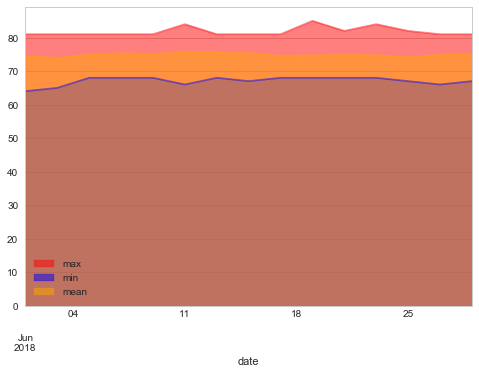

In [215]:
df_all.plot.area(stacked=False, color=['r', 'b', 'orange'])
plt.show()

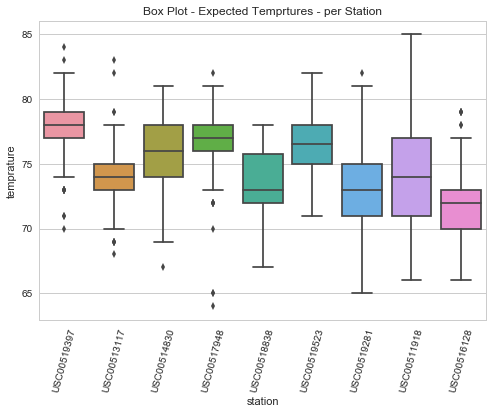

In [208]:
sns.boxplot(data=df, x='station', y='temprature', orient='90' )
plt.xticks(rotation=75)
plt.title('Box Plot - Expected Temprtures - per Station')
plt.show()